reading file: /Users/jeromezhang/Documents/insarlab/Kyushu/KyushuT422F650AlosA/TIMESERIES/geomap_4rlks_tight.trans
read range from /Users/jeromezhang/Documents/insarlab/Kyushu/KyushuT422F650AlosA/TIMESERIES/geomap_4rlks_tight.trans
read azimuth from /Users/jeromezhang/Documents/insarlab/Kyushu/KyushuT422F650AlosA/TIMESERIES/geomap_4rlks_tight.trans
Residul - lat: 7.50000000007e-05, lon: 0.001775
read azimuth from /Users/jeromezhang/Documents/insarlab/Kyushu/KyushuT422F650AlosA/TIMESERIES/geomap_4rlks_tight.trans
data   coverage in y/x: (0, 0, 3138, 2695)
subset coverage in y/x: (0, 0, 3138, 2695)
data   coverage in lat/lon: (131.02409876, 33.63756779, 132.07008829999998, 32.739243439999996)
subset coverage in lat/lon: (131.02409876, 33.63756779, 132.07008829999998, 32.739243439999996)
------------------------------------------------------------------------
colormap: jet
data    unit: 1
display unit: 1
data    range: 0.0 - 2299.49975586
display range: 0.0 - 2299.49975586
display data in

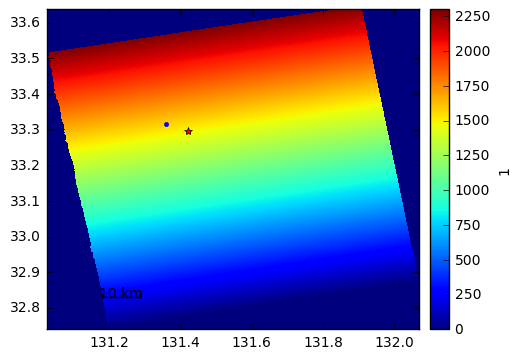

In [1]:
'''Convert radar coord into geo coord: comparison between using geomapFile and using corner lat/lon'''
import numpy as np
import matplotlib.pyplot as plt
import pysar._readfile as readfile
import pysar._pysar_utilities as ut
import pysar.view as view

work_dir = '/Users/jeromezhang/Documents/insarlab/Kyushu/KyushuT422F650AlosA/TIMESERIES'
geomapFile = work_dir+'/geomap_4rlks_tight.trans'
rdrFile = work_dir+'/temporal_coherence.h5'

rg=np.array([1000, 1000])
az=np.array([1500, 1000])

lat0, lon0 = ut.radar2glob(az, rg, geomapFile, rdrFile)[0:2]
lat1, lon1 = ut.radar2glob(az, rg, None, rdrFile)[0:2]

img, atr = readfile.read(geomapFile, (), 'azimuth')
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax = view.plot_matrix(ax, img, atr)[0]

ax.plot(lon0, lat0, 'r*')  #using geomap*.trans, accurate
ax.plot(lon1, lat1, 'b.')  #using corner lat/lon, not accurate

plt.show()


